In [1]:
from pathlib import Path

## Zadanie 4

In [3]:
instrukcje = []
with open('DANE_2105/instrukcje.txt') as f:
    for wiersz in f:
        wiersz= wiersz.strip()
        instrukcje.append(wiersz)

In [5]:
instrukcje_przyklad = []
with open('DANE_2105/przyklad.txt') as f:
    for wiersz in f:
        wiersz= wiersz.strip()
        instrukcje_przyklad.append(wiersz)

In [6]:
instrukcje_przyklad

['DOPISZ Z',
 'DOPISZ U',
 'USUN 1',
 'DOPISZ L',
 'DOPISZ A',
 'PRZESUN Z',
 'DOPISZ U',
 'PRZESUN U',
 'ZMIEN M',
 'PRZESUN M',
 'DOPISZ N',
 'USUN 1',
 'DOPISZ T',
 'DOPISZ U',
 'DOPISZ R',
 'DOPISZ H',
 'DOPISZ N',
 'PRZESUN H',
 'DOPISZ V',
 'ZMIEN G']

In [7]:
def zadanie_4_1(wejscie):
    wynik = 0
    for item in wejscie:
        krok = item.split()[0]
        if krok == 'DOPISZ':
            wynik+=1
        if krok == 'USUN':
            wynik-=1
        if krok == 'ZMIEN':
            pass
        if krok == 'PRZESUN':
            pass
    

    return wynik

In [66]:
zadanie_4_1(instrukcje)

517

In [67]:
def zadanie_4_2(wejscie):
    best = ['Start',0]
    poprzedni = 'Start'
    dlugosc = 0
    for idx,item in enumerate(wejscie):
        krok = item.split()[0]
        if krok == poprzedni:
            dlugosc+=1
        else:
            if dlugosc > best[1]:
                best[0]=wejscie[idx-1].split()[0]
                best[1]=dlugosc
            poprzedni = krok
            dlugosc = 1

    return best


In [75]:
zadanie_4_2(instrukcje)

['ZMIEN', 7]

In [59]:
def zadanie_4_3(wejscie):
    litery = {}
    for item in wejscie:
        krok = item.split()
        if krok[0] == 'DOPISZ':
            if krok[1] in litery.keys() :
                litery[krok[1]]=litery[krok[1]]+1
            else:
                litery[krok[1]]=1
    wynik = max(litery, key=litery.get)

    return wynik,litery[wynik]

In [60]:
zadanie_4_3(instrukcje)

('Z', 37)

In [61]:
def zadanie_4_4(wejscie):
    slowo = []
    alfabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    for item in wejscie:
        krok = item.split()
        if krok[0] == 'DOPISZ':
            slowo.append(krok[1])
        if krok[0] == 'USUN':
            slowo.pop()
        if krok[0] == 'ZMIEN':
            slowo[-1]=krok[1]
        if krok[0] == 'PRZESUN':
            idx = slowo.index(krok[1])
            if krok[1]=='Z':
                slowo[idx]='A'
            else:
                # print(slowo[idx])
                slowo[idx] = alfabet[alfabet.index(slowo[idx])+1]
    

    return ''.join(slowo)

In [72]:
zdanie = zadanie_4_4(instrukcje)
zdanie

'POZNIEJMOWIONOZECZLOWIEKTENNADSZEDLODPOLNOCYODBRAMYPOWROZNICZEJSZEDLPIESZOAOBJUCZONEGOKONIAPROWADZILZAUZDEBYLOPOZNEPOPOLUDNIEIKRAMYPOWROZNIKOWIRYMARZYBYLYJUZZAMKNIETEAULICZKAPUSTABYLOCIEPLOACZLOWIEKTENMIALNASOBIECZARNYPLASZCZNARZUCONYNARAMIONAZWRACALUWAGEZATRZYMALSIEPRZEDGOSPODASTARYNARAKORTPOSTALCHWILEPOSLUCHALGWARUGLOSOWGOSPODAJAKZWYKLEOTEJPORZEBYLAPELNALUDZINIEZNAJOMYNIEWSZEDLDOSTAREGONARAKORTUPOCIAGNALKONIADALEJWDOLULICZKITAMBYLADRUGAKARCZMAMNIEJSZANAZYWALASIEPODLISEMTUBYLOPUSTOKARCZMANIEMIALANAJLEPSZEJSLAWY'

In [63]:
zdanie == "POZNIEJMOWIONOZECZLOWIEKTENNADSZEDLODPOLNOCYODBRAMYPOWROZNICZEJSZEDLPIESZOAOBJUCZONEGOKONIAPROWADZILZAUZDEBYLOPOZNEPOPOLUDNIEIKRAMYPOWROZNIKOWIRYMARZYBYLYJUZZAMKNIETEAULICZKAPUSTABYLOCIEPLOACZLOWIEKTENMIALNASOBIECZARNYPLASZCZNARZUCONYNARAMIONAZWRACALUWAGEZATRZYMALSIEPRZEDGOSPODASTARYNARAKORTPOSTALCHWILEPOSLUCHALGWARUGLOSOWGOSPODAJAKZWYKLEOTEJPORZEBYLAPELNALUDZINIEZNAJOMYNIEWSZEDLDOSTAREGONARAKORTUPOCIAGNALKONIADALEJWDOLULICZKITAMBYLADRUGAKARCZMAMNIEJSZANAZYWALASIEPODLISEMTUBYLOPUSTOKARCZMANIEMIALANAJLEPSZEJSLAWY"

True

## Zadanie 5

Wodociągi miejskie zamierzają wykonać analizę zużycia wody. W tym celu zgromadziły dane 
o poborze wody przez wszystkich swoich klientów za rok 2019. Dane są zapisane w pliku 
wodociagi.txt. Pierwszy wiersz pliku jest wierszem nagłówkowym, a dane rozdzielono 
średnikami. W każdym wierszu zapisano informacje dotyczące gospodarstwa domowego 
jednego klienta: dziesięcioznakowy kod klienta oraz 12 liczb całkowitych oznaczających ilości 
zużytej wody w m3 przez kolejnych 12 miesięcy (od stycznia do grudnia). Kod klienta składa 
się z pięciocyfrowego numeru klienta, dwucyfrowej liczby oznaczającej liczbę osób 
pozostających we wspólnym gospodarstwie domowym oraz trzyliterowego kodu dzielnicy 
miasta. Każdy kod jest unikatowy. 

Fragment pliku wodociagi.txt: 

KodKlienta;I;II;III;IV;V;VI;VII;VIII;IX;X;XI;XII 
0000103WIL;6;6;6;9;6;15;12;12;12;6;9;6 
0000403BEM;6;3;9;9;12;15;15;15;9;6;3;9 

Korzystając z powyższych danych oraz dostępnych narzędzi informatycznych, wykonaj 
podane zadania. Wyniki zapisz w pliku tekstowym wyniki5.txt. Odpowiedź do każdego 
zadania poprzedź numerem tego zadania.

In [7]:
wodociagi = []
with open('2021_Dane_PR2/wodociagi.txt') as f:
    for wiersz in f:
        wiersz= wiersz.strip()
        wodociagi.append(wiersz)

### Zadanie 5.1

Utwórz zestawienie zawierające pięciocyfrowe numery 10 klientów, którzy w ciągu roku 
zużyli w swoim gospodarstwie domowym średnio najwięcej wody na jedną osobę, oraz ich 
średnie zużycie wody na jedną osobę. Średnioroczne zużycie wody na jedną osobę zaokrąglij 
do dwóch miejsc po przecinku. 
Zestawienie, zawierające numery klientów i średnie zużycie wody na jedną osobę, uporządkuj 
nierosnąco według średniej.

In [243]:
import pandas as pd

In [244]:
data = pd.read_csv('2021_Dane_PR2/wodociagi.txt',sep=';',header='infer')

In [246]:
data.head()

,KodKlienta,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII
0,0000104WIL,10,10,5,8,14,18,21,17,10,9,4,10
1,0000201ZOL,2,2,1,3,3,4,4,4,2,2,2,2
2,0000302MOK,4,4,2,6,5,7,10,8,4,6,3,3
3,0000402MOK,3,3,3,5,4,7,9,7,4,6,2,2
4,0000503BIE,7,3,7,8,7,10,13,10,6,9,7,7


In [247]:
data['numer_klienta']=data['KodKlienta'].str[:5]

In [248]:
data['ilosc_osob']=data['KodKlienta'].str[5:7].astype('int')

In [249]:
data['dzielnica']=data['KodKlienta'].str[7:10]

In [256]:
data.head()

,KodKlienta,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,numer_klienta,ilosc_osob,dzielnica,roczne_zuzycie
0,0000104WIL,10,10,5,8,14,18,21,17,10,9,4,10,00001,4,WIL,136
1,0000201ZOL,2,2,1,3,3,4,4,4,2,2,2,2,00002,1,ZOL,31
2,0000302MOK,4,4,2,6,5,7,10,8,4,6,3,3,00003,2,MOK,62
3,0000402MOK,3,3,3,5,4,7,9,7,4,6,2,2,00004,2,MOK,55
4,0000503BIE,7,3,7,8,7,10,13,10,6,9,7,7,00005,3,BIE,94


In [274]:
data['roczne_zuzycie'] = data.I + data.II + data.III + data.IV + data.V + data.VI+data.VII+data.VIII+data.IX+data.X+data.XI+data.XII

In [275]:
data['srednie_na_osobe']=data['roczne_zuzycie']/data['ilosc_osob']
data['srednie_na_osobe']=data.srednie_na_osobe.round(2)

In [276]:
data_5_1 = data.sort_values(by='srednie_na_osobe', ascending=False)
data_5_1[:10]

,KodKlienta,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,numer_klienta,ilosc_osob,dzielnica,roczne_zuzycie,srednie_na_osobe
7934,0793503REM,7,7,9,12,12,15,19,13,8,8,5,9,07935,3,REM,124,41.33
5079,0508003URU,7,8,7,8,11,14,19,13,9,8,7,9,05080,3,URU,120,40.00
644,0064504WIL,9,9,11,14,12,19,24,17,12,13,10,9,00645,4,WIL,159,39.75
8089,0809004PRA,10,9,9,14,15,19,22,15,12,13,11,9,08090,4,PRA,158,39.50
5737,0573803WLO,7,6,7,12,12,13,16,13,10,9,6,7,05738,3,WLO,118,39.33
8348,0834905WES,12,12,12,15,17,25,29,19,17,14,11,13,08349,5,WES,196,39.20
8849,0885004BIA,8,8,9,14,15,18,22,16,14,13,9,10,08850,4,BIA,156,39.00
2201,0220204REM,9,10,11,14,12,19,19,18,14,11,7,9,02202,4,REM,153,38.25
9467,0946804PRA,10,7,4,10,15,16,24,17,14,14,10,10,09468,4,PRA,151,37.75
6865,0686604REM,5,8,9,13,13,18,19,17,14,14,9,8,06866,4,REM,147,36.75


### Zadanie 5.2

Dla każdej dzielnicy podaj całkowite roczne zużycie wody przez jej wszystkich mieszkańców. 

In [260]:
data_5_2 = data.groupby(['dzielnica']).sum()

In [261]:
data_5_2['roczne_zuzycie']

dzielnica
BEM    54080
BIA    61614
BIE    56368
MOK    55889
OCH    59273
PRA    57241
REM    58971
SRO    58124
TAR    60234
URU    59597
URY    50116
WAW    57674
WES    60372
WIL    55476
WLO    66372
WOL    60523
ZOL    62312
Name: roczne_zuzycie, dtype: int64

### Zdanie 5.3

Dla każdej dzielnicy oblicz zużycie wody w każdym miesiącu łącznie przez wszystkich 
mieszkańców tej dzielnicy. Podaj maksymalne miesięczne zużycie wody w każdej z dzielnic. 

In [62]:
data_5_3 = data.groupby(['dzielnica']).sum()

In [67]:
data_5_3['max_zuzycie'] = data_5_3[['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII']].max(axis=1)

In [268]:
data_5_3['max_zuzycie']

dzielnica
BEM    8108
BIA    9274
BIE    8475
MOK    8452
OCH    8861
PRA    8575
REM    8873
SRO    8776
TAR    9120
URU    8960
URY    7519
WAW    8699
WES    9050
WIL    8284
WLO    9966
WOL    9117
ZOL    9417
Name: max_zuzycie, dtype: int64

## Zadanie 5.4

Dział inwestycji analizuje konieczność modernizacji sieci wodociągowej na podstawie danych 
za rok 2019. Jako podstawę obliczeń bierze sumaryczne zużycie wody w każdym z 12 
miesięcy. Inżynierowie założyli, że sumaryczne miesięczne zużycie wody będzie rosło o 1% 
rok do roku każdego miesiąca ( w m3 z zaokrągleniem w górę do najbliższej liczby całkowitej ). 
Przykład: 
jeśli w styczniu 2019 roku sumaryczne zużycie wody w mieście wyniosło 53 545 m3, to 
w styczniu 2020 przewidywane zużycie wyniesie 54 081 m3. 
Uwaga: dla danych z zadania przewidywane zużycie wody w maju 2025 roku wyniesie 
90 898 m3.

Obecnie maksymalny miesięczny przepływ (wydajność sieci) wynosi 160 000 m3. Podaj rok 
i miesiąc, w którym pierwszy raz zabraknie wody w mieście ( przewidywane zużycie będzie 
większe niż maksymalny przepływ sieci ). 
Sporządź zestawienie obrazujące przewidywane zużycie wody w każdym z kolejnych miesięcy 
od stycznia 2020 roku do grudnia 2030 roku. 
Narysuj wykres liniowy obrazujący przewidywane zużycie wody w każdym z kolejnych 
miesięcy w 2030 roku.

In [282]:
data_5_4 = data.sum()

In [283]:
data_5_4 = data_5_4.to_frame().transpose().drop(['KodKlienta','numer_klienta','ilosc_osob','dzielnica','roczne_zuzycie','srednie_na_osobe'],axis=1)

In [284]:
data_5_4['rok'] = 2019

In [285]:
data_5_4

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,rok
0,53545,53274,53195,85745,85627,117552,149526,117497,85623,85530,53516,53606,2019


In [191]:
(2030-2019)*12

132

In [192]:
data_5_4.iloc[0]

I        53545
II       53274
III      53195
IV       85745
V        85627
VI      117552
VII     149526
VIII    117497
IX       85623
X        85530
XI       53516
XII      53606
rok       2019
Name: 0, dtype: object

In [193]:
rok = 2019
for item in range(1,12):
    data_5_4.loc[item] = data_5_4.iloc[item-1]*1.01
    data_5_4['rok'].loc[item]=int(rok+item)

C:\Users\AdamSzummer\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [201]:
data_5_4

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,rok
0,53545,53274,53195,85745,85627,117552,149526,117497,85623,85530,53516,53606,2019.0
1,54080.45,53806.74,53726.95,86602.45,86483.27,118727.52,151021.26,118671.97,86479.23,86385.3,54051.16,54142.06,2020.0
2,54621.2545,54344.8074,54264.2195,87468.4745,87348.1027,119914.7952,152531.4726,119858.6897,87344.0223,87249.153,54591.6716,54683.4806,2021.0
3,55167.467045,54888.255474,54806.861695,88343.159245,88221.583727,121113.943152,154056.787326,121057.276597,88217.462523,88121.64453,55137.588316,55230.315406,2022.0
4,55719.141715,55437.138029,55354.930312,89226.590837,89103.799564,122325.082584,155597.355199,122267.849363,89099.637148,89002.860975,55688.964199,55782.61856,2023.0
5,56276.333133,55991.509409,55908.479615,90118.856746,89994.83756,123548.333409,157153.328751,123490.527857,89990.63352,89892.889585,56245.853841,56340.444746,2024.0
6,56839.096464,56551.424503,56467.564411,91020.045313,90894.785936,124783.816743,158724.862039,124725.433135,90890.539855,90791.818481,56808.31238,56903.849193,2025.0
7,57407.487429,57116.938748,57032.240055,91930.245766,91803.733795,126031.654911,160312.110659,125972.687467,91799.445253,91699.736666,57376.395503,57472.887685,2026.0
8,57981.562303,57688.108136,57602.562456,92849.548224,92721.771133,127291.97146,161915.231766,127232.414341,92717.439706,92616.734032,57950.159458,58047.616562,2027.0
9,58561.377926,58264.989217,58178.58808,93778.043706,93648.988844,128564.891175,163534.384083,128504.738485,93644.614103,93542.901373,58529.661053,58628.092728,2028.0


In [219]:
data_5_4.where(data_5_4['VII']>160000)

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,rok
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,57407.487429,57116.938748,57032.240055,91930.245766,91803.733795,126031.654911,160312.110659,125972.687467,91799.445253,91699.736666,57376.395503,57472.887685,2026.0
8,57981.562303,57688.108136,57602.562456,92849.548224,92721.771133,127291.97146,161915.231766,127232.414341,92717.439706,92616.734032,57950.159458,58047.616562,2027.0
9,58561.377926,58264.989217,58178.58808,93778.043706,93648.988844,128564.891175,163534.384083,128504.738485,93644.614103,93542.901373,58529.661053,58628.092728,2028.0


In [221]:
data_wykres = data_5_4[data_5_4.rok==2030.0]

In [222]:
data_wykres

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,rok
11,59738.461622,59436.1155,59347.977701,95662.982385,95531.33352,131149.045487,166821.425203,131087.683728,95526.870847,95423.11369,59706.10724,59806.517391,2030.0


In [205]:
data_wykres = data_wykres.transpose().drop(['rok'])
data_wykres

,11
I,59738.461622
II,59436.1155
III,59347.977701
IV,95662.982385
V,95531.33352
VI,131149.045487
VII,166821.425203
VIII,131087.683728
IX,95526.870847
X,95423.11369


In [206]:
import matplotlib.pyplot as plt

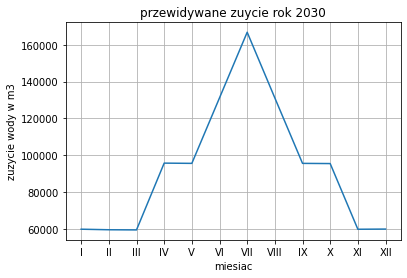

In [211]:
plt.title('przewidywane zuycie rok 2030')
plt.xlabel('miesiac')
plt.ylabel('zuzycie wody w m3')
plt.grid(True)
plt.plot(data_wykres)

## Zadanie 5.5

Wodociągi miejskie zaplanowały inwestycję, która począwszy od 2021 roku corocznie 
w styczniu pozwoli na zwiększanie maksymalnego przepływu o 1000 m3. 
Podaj rok i miesiąc, kiedy pierwszy raz zabraknie wody w mieście po uwzględnieniu tej 
inwestycji. 

In [241]:
data_5_5 =  data_5_4

In [242]:
rok = 2019
limit = 160000
for item in range(1,22):
    if item > 1 :
        limit +=1000
    data_5_5.loc[item] = data_5_5.iloc[item-1]*1.01
    data_5_5['rok'].loc[item]=int(rok+item)
    if data_5_5['VII'].loc[item] > limit:
        print (data_5_5.loc[item])
        break
print(limit)

I        62785.723542
II        62467.95473
III      62375.321017
IV      100542.755909
V       100404.391629
VI      137838.964868
VII     175330.994461
VIII    137774.473043
IX      100399.701314
X         100290.6515
XI       62751.718762
XII       62857.25084
rok            2035.0
Name: 16, dtype: object
175000
